# Example of plotting metrics of matching
Example of the functions to plot metrics of matching.

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import numpy as np
import pylab as plt
from astropy.table import Table

## Generate random data and add to catalog

In [2]:
from support import gen_cluster
input1, input2 = gen_cluster()

In [5]:
from clevar.catalog import Catalog
c1 = Catalog('Cat1', ra=input1['RA'], dec=input1['DEC'], z=input1['Z'], mass=input1['MASS'],
            mass_err=input1['MASS_ERR'], z_err=input1['Z_ERR'])
c2 = Catalog('Cat2', ra=input2['RA'], dec=input2['DEC'], z=input2['Z'], mass=input2['MASS'],
            mass_err=input2['MASS_ERR'], z_err=input2['Z_ERR'])

## Match catalogs

In [6]:
from clevar.match.proximity import ProximityMatch
from clevar.cosmology import AstroPyCosmology

match_config = {
    'type': 'cross', # options are cross, cat1, cat2
    'which_radius': 'max', # Case of radius to be used, can be: cat1, cat2, min, max
    'preference': 'angular_proximity', # options are more_massive, angular_proximity or redshift_proximity
    'catalog1': {'delta_z':.2,
                'match_radius': '1 mpc'
                },
    'catalog2': {'delta_z':.2,
                'match_radius': '10 arcsec'
                }
}

cosmo = AstroPyCosmology()
mt = ProximityMatch()
mt.match_from_config(c1, c2, match_config, cosmo=cosmo)


## Catalog 1
## Prep mt_cols
* zmin|zmax from config value
* ang radius from set scale

## Catalog 2
## Prep mt_cols
* zmin|zmax from config value
* ang radius from set scale

## Multiple match (catalog 1)
* 400/700 objects matched.

## Multiple match (catalog 2)
* 401/700 objects matched.

## Finding unique matches of catalog 1
* 400/700 objects matched.

## Finding unique matches of catalog 2
* 401/700 objects matched.


## Recovery rate
Compute recovery rates, they are computed in mass and redshift bins. There are several ways they can be displayed:
- Single panel with multiple lines
- Multiple panels
- 2D color map

In [9]:
from clevar.metrics import recovery

In [10]:
zbins = np.linspace(0, 2, 6)
mbins = np.logspace(13, 14, 5)

### Simple plot
The recovery rates are shown as a function of redshift in mass bins.
They can be displayed as a continuous line or with steps:

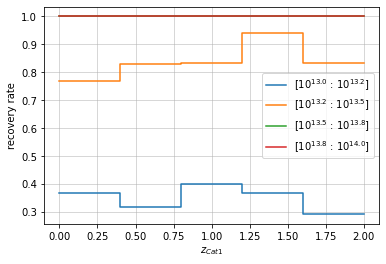

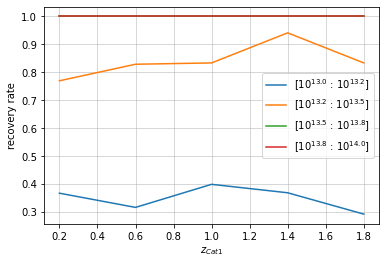

In [12]:
recovery.plot(c1, 'cross', zbins, mbins)
plt.show()
recovery.plot(c1, 'cross', zbins, mbins, shape='line')
plt.show()

They can also be transposed to be shown as a function of mass in redshift bins.

<AxesSubplot:xlabel='$mass_{Cat1}$', ylabel='recovery rate'>

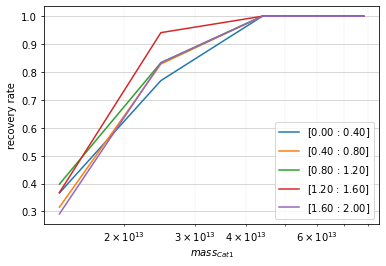

In [13]:
recovery.plot(c1, 'cross', zbins, mbins,
              shape='line', transpose=True)

### Panels plots
You can also have a panel for each bin:

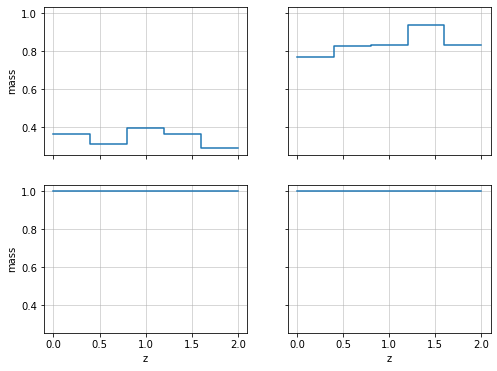

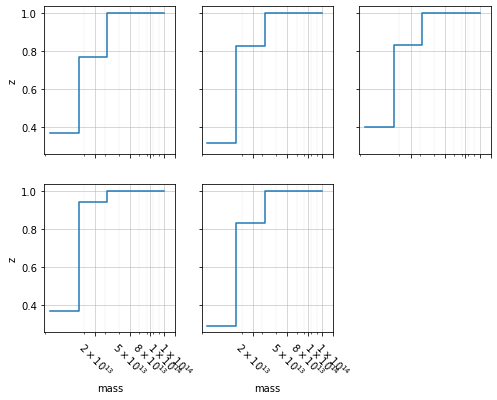

In [14]:
f, axes = recovery.plot_panel(c1, 'cross', zbins, mbins)
plt.show()
f, axes = recovery.plot_panel(c1, 'cross', zbins, mbins, transpose=True)
plt.show()

### 2D plots

In [ ]:
recovery.plot2D(c1, 'mt_cross', zbins, mbins)
plt.show()

recovery.plot2D(c1, 'mt_cross', zbins, mbins,
                add_num=True, num_kwargs={'fontsize':15})
plt.show()

# Distances of matching

In [ ]:
from clevar.metrics import distances

In [ ]:
ax = distances.central_position(c1, c2, 'mt_cross', 20, 'degrees')

In [ ]:
ax = distances.redshift(c1, c2, 'mt_cross', redshift_bins=20,
                        mass_bins=mbins, normalize='cat1')

# Scaling Relations

In [ ]:
from clevar.metrics import scaling

## Redshift plots

### Simple plot

In [ ]:
ax = scaling.redshift(c1, c2, 'mt_cross')
plt.show()
ax = scaling.redshift(c1, c2, 'mt_cross', add_err=True)
plt.show()

### Color points by $\log(M)$ value

In [ ]:
ax, cb = scaling.redshift_masscolor(c1, c2, 'mt_cross', add_err=True)

### Color points by density at plot

In [ ]:
ax, cb = scaling.redshift_density(c1, c2, 'mt_cross', add_err=True)

In [ ]:
ax, cb = scaling.redshift_density(c1, c2, 'mt_cross', ax_rotation=45)

### Split data into mass bins

In [ ]:
fig, axes = scaling.redshift_masspanel(c1, c2, 'mt_cross', add_err=True)

### Split data into mass bins and color by density

In [ ]:
fig, axes = scaling.redshift_density_masspanel(c1, c2, 'mt_cross', add_err=True)

## Mass plots

### Simple plot

In [ ]:
ax = scaling.mass(c1, c2, 'mt_cross', add_err=True)

### Color points by redshift value

In [ ]:
ax, cb = scaling.mass_zcolor(c1, c2, 'mt_cross', add_err=True)

### Color points by density at plot

In [ ]:
ax, cb = scaling.mass_density(c1, c2, 'mt_cross', add_err=True)

### Split data into redshift bins

In [ ]:
fig, axes = scaling.mass_zpanel(c1, c2, 'mt_cross', add_err=True)

### Split data into redshift bins and color by density

In [ ]:
fig, axes = scaling.mass_density_zpanel(c1, c2, 'mt_cross', add_err=True)